<a href="https://colab.research.google.com/github/zakyzuf/PCVK_Ganjil_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Praktikum 10 – GLOBAL THRESHOLDING

import folder yang ada di Drive Anda dengan cara sebagai berikut.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [4]:
pip install pytesseract

In [6]:
import cv2 as cv
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.

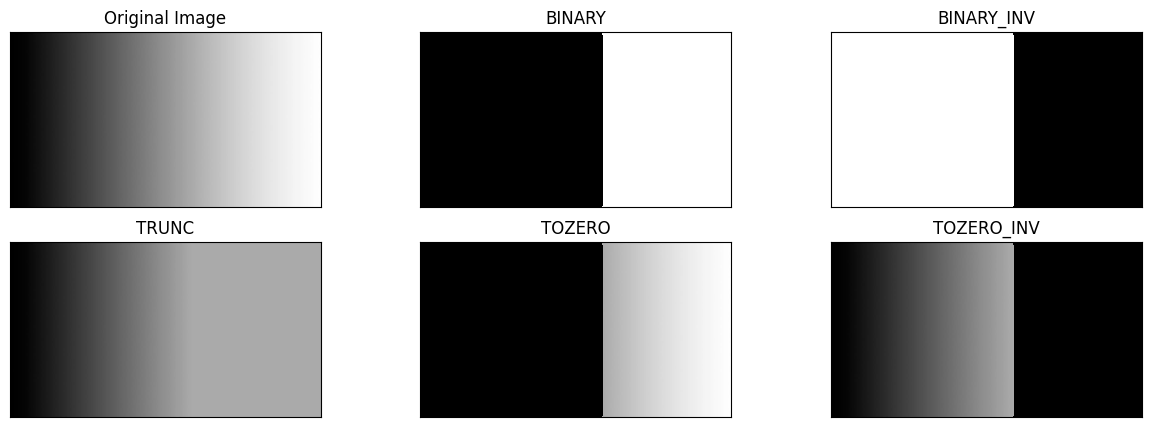

In [16]:
filename = ('/content/drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh = 170 #nilai Threshold yang ditentukan
#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selainitu bernilai 0(hitam)
thresh1 = (img > thresh) * 255
#2. thresh2 adalah binary threshold inverse
thresh2 = 255 - thresh1
#3. Threshold Truncate
thresh3 = np.where(img > thresh, thresh, img)
#4. Threshold Tozero
thresh4 = np.where(img > thresh, img, 0)
#5. Threshold Tozero Inverse
thresh5 = np.where(img > thresh, 0, img)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

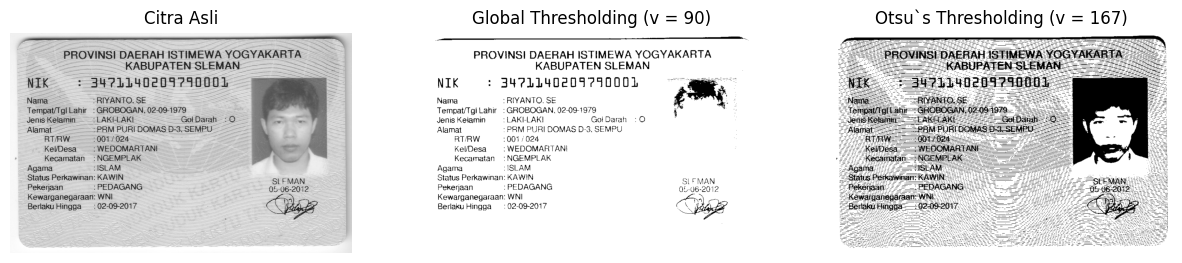

In [27]:
image = cv.imread('/content/drive/MyDrive/PCVK/KTP_More/ktp.png', 0)

# Mengitung histogram dan probabilitas setiap tingkat intensitas
histogram = np.histogram(image, bins=256, range=(0, 256), density=True)[0]
total_pixels = image.shape[0] * image.shape[1]
probabilities = histogram / total_pixels

# Inisialisasi variabel
maximum_variance = 0
optimal_threshold = 0

# Ulangi semua nilai ambang batas yang mungkin
for t in range(256):
  # Hitung bobot dan rata-rata
  w0 = np.sum(probabilities[:t])
  w1 = np.sum(probabilities[t:])
  mean0 = np.sum(np.arange(t) * probabilities[:t]) / w0 if w0 > 0 else 0
  mean1 = np.sum(np.arange(t, 256) * probabilities[t:]) / w1 if w1 > 0 else 0

  # Hitung varians antar kelas
  variance = w0 * w1 * (mean0 - mean1) ** 2

  # Memperbarui varian maksimum dan ambang batas optimal
  if variance > maximum_variance:
      maximum_variance = variance
      optimal_threshold = t

# Terapkan ambang batas
thresholded_image = (image > 90) * 255
optimal_thresholded_image = (image > optimal_threshold) * 255

# Menampilkan hasil
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Asli')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(thresholded_image, cmap='gray')
plt.title(f'Global Thresholding (v = 90)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(optimal_thresholded_image, cmap='gray')
plt.title(f'Otsu`s Thresholding (v = {optimal_threshold})')
plt.axis('off')

plt.show()

Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:
<ul>
  <li>a. anda dapat gunakan cv.calcHist untuk menampilkan histogram. </li>
  <li>b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html </li>
  <li>c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter yaitu mask. Jika diset None, maka keseluruhan image akan dihitung histogramnya. Jika kita tentukan mask, maka hanya bagian image yang dimasking warna putih yang akan dihitung histogramnya (dari contoh dibawah dinamakan dengan Citra Segment).</li>
</ul>

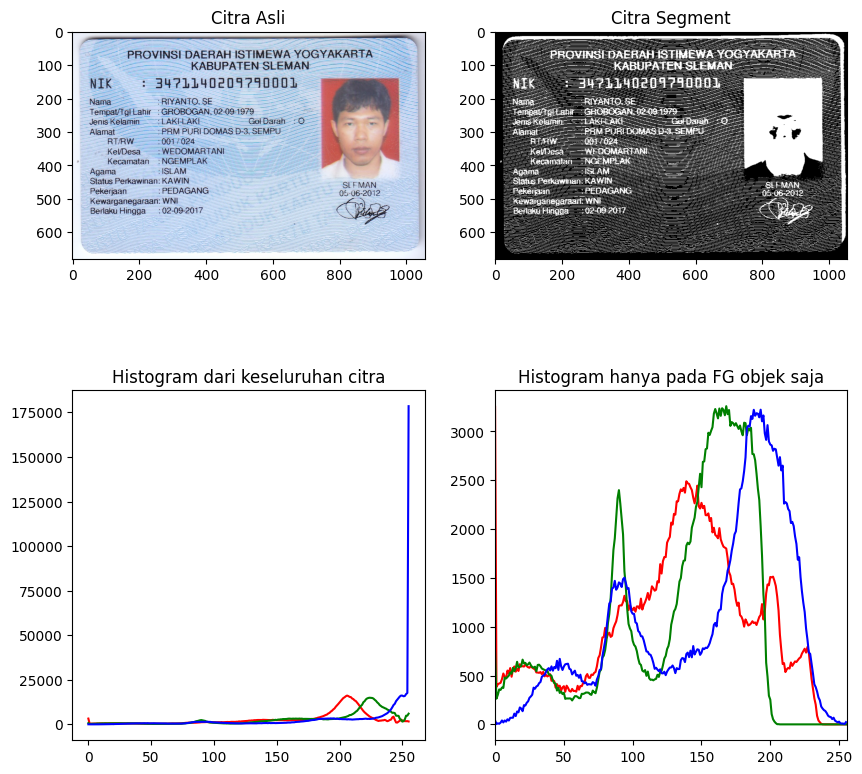

In [32]:
filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
  hist0 = cv.calcHist([img],[i],None,[256],[0,256])
  plt.subplot(2,2,3),plt.plot(hist0,color = col)
  plt.title('Histogram dari keseluruhan citra')
  hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
  plt.subplot(2,2,4),plt.plot(hist1,color = col)
  plt.title('Histogram hanya pada FG objek saja')
  plt.xlim([0,256])

plt.show()

Lakukan segmentasi warna pada image " ktp Riyanto.jpg ", munculkan hanya warna
yang biru saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f72eebefdf0>)

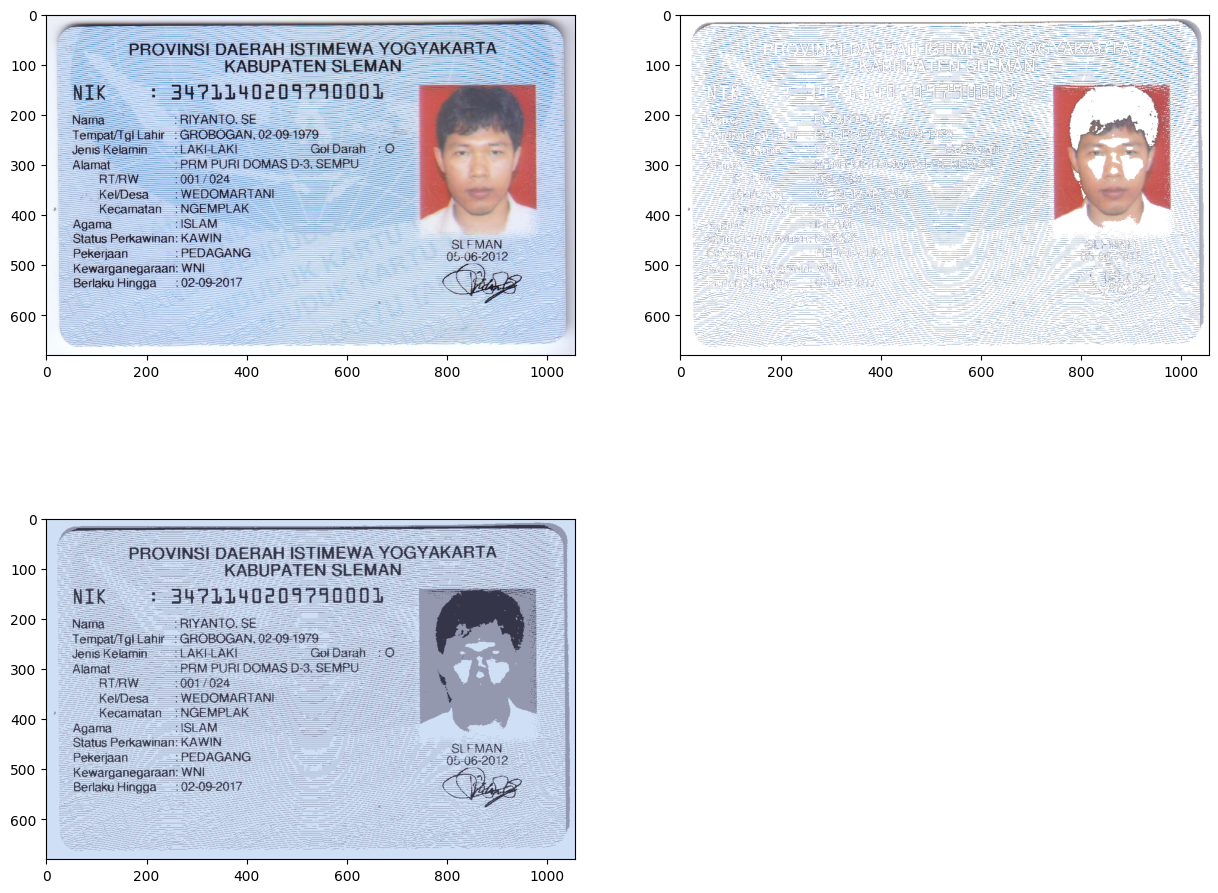

In [40]:
filename = ('/content/drive/MyDrive/PCVK/KTP_More/ktp.png')
img = cv.imread(filename)
img_rgb2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)

pixel_values = img_rgb2.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)

masked_image = np.copy(img_rgb2)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(img_rgb2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_rgb2)
plt.subplot(2,2,2),plt.imshow(masked_image0)
plt.subplot(2,2,3),plt.imshow(segmented_image)

## Tugasnya adalah mengimplementasikan thresholding dengan beberapa metode yang telah Anda ketahui untuk melakukan segmentasi pada dataset KTP pertemuan 7 dan Hasil OCR

In [45]:
!apt-get install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,277 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

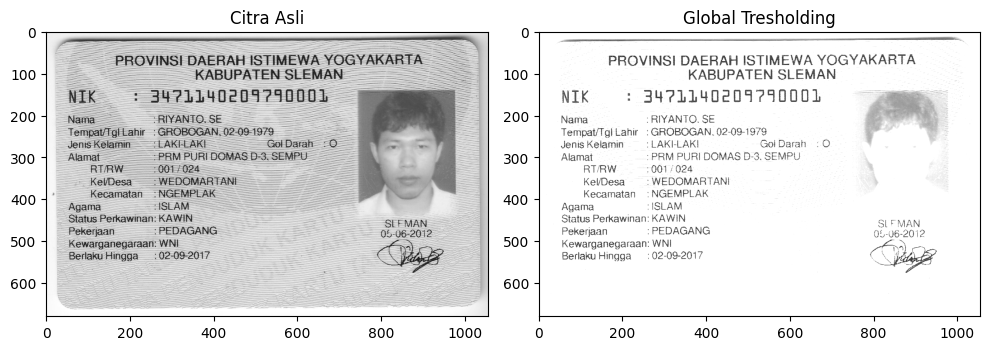

EEE

PROVINSI DAERAH ISTIMEWA YOGYAKARTA
KABUPATEN SLEMAN

 

NIK > 347LL40209790001

Nama :RIYANTO. SE

Tempat/Tgl Lahir : GROBOGAN, 02-09-1979

denis Kelamin > LAKI-LAKI Gol Darah +O

Alamat PRM PURI DOMAS D-3. SEMPU
RTARW :001 (024

Kel/Desa : WEDOMARTANI
Kecamatan :NGEMPLAK

Agama ‘ISLAM
Status Bea KAWIN SLEMAN
Pekerjaan : PEDAGANG 04-06-2012

Kewarganegaraan: WNI ~)
Berlaku Hingga —_: 02-09-2017 \ $44)

   
 

 



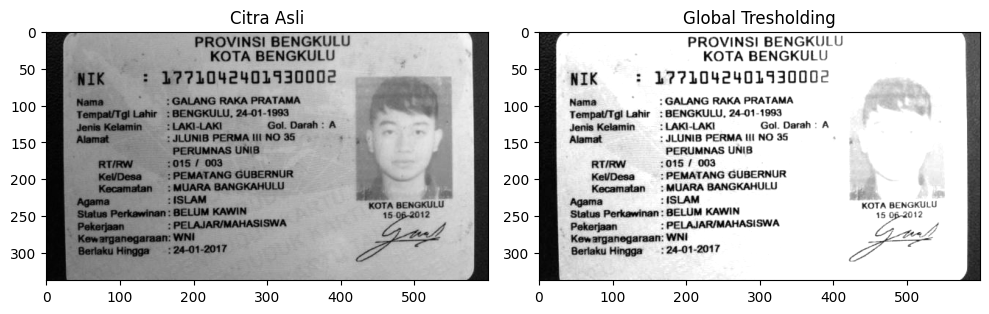

PROVINS! BENGKULU
KOTA BENGKULU

WIK = 477104240193000e

Nama
Tempat/Tgl Lahir
Jenis Kelamin
Aiamat

RTRW
KelDesa
Kecamatan

Agema
‘Status Perkawinan :

Kewarganegaraan:
Berlaku Hingga:

2 GALANG RAKA PRATAMA

: BENGKULU, 24-01-1993

: LAKI-LAKI Gol. Darah : A
:JLUNIB PERMA III NO 35

PERUMNAS UNIB

7015 / 003
: PEMATANG GUBERNUR
: MUARA BANGKAHULU
ZISLAM of
BELUM KAWIN KOTA BENGKULU
: PELAJAR/MAHASISWA Lo

Wnt to
24-01-2017 ZO =



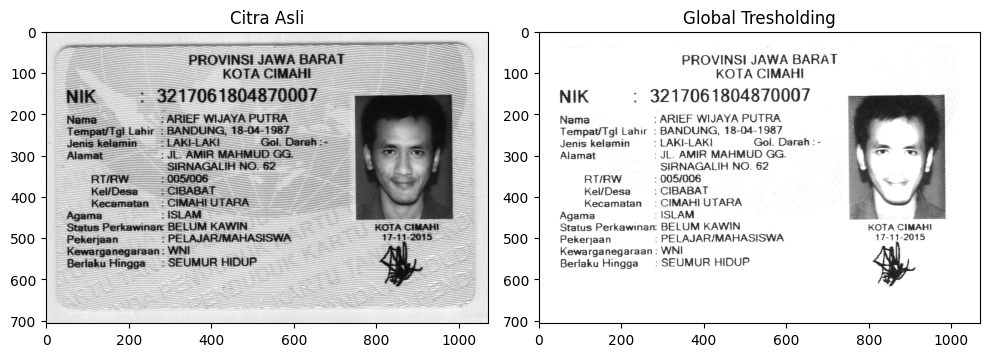

PROVINSI JAWA BARAT

 

KOTA CIMAHI
NIK : 3217061804870007
Nama : ARIEF WIJAYA PUTRA
Tempat/Tgi Lahir ; BANDUNG, 18-04-1987
Jenis kelamin : LAKE-LAKI Gol. Darah :-
Alamat : JL. AMIR MAHMUD GG.
SIRNAGALIH NO. 62

RT/RW ; 005/006

Kel/Desa ; CIBABAT

Kecamatan : CIMAHI UTARA
Agama : ISLAM
Status Perkawinan: BELUM KAWIN KOTA CIMAHI
Pekerjaan : PELAJAR/MAHASISWA 17-11-2015
Kewarganegaraan: WNI

Berlaku Hingga

: SEUMUR HIDUP



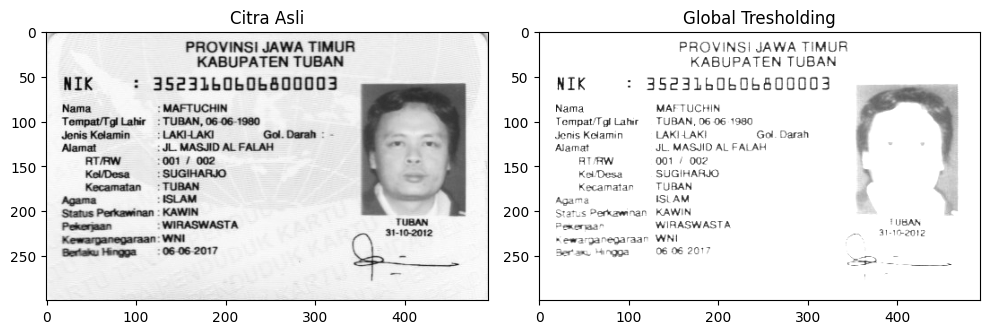

PROVINSI JAWA TIMUR
KABUPATEN TUBAN

NIK  : 352316060b800003
Nama MAFTUCHIN
Tempat/T@l Lahir TUBAN, 06-06 1990
Jen's KelaminLAKILAK! Gol Darah
‘Namat IL MASJID AL FALAH
BTW 001 / og
KelDesa —_SUGIHARUO > 6
Kecamatan TUBAN
ISLAM é N
KAWIN

 

WIRASWASTA 1 UBAN
sewarpaneparaan WNI manent

Beran -ogg2 06 06 2017

 



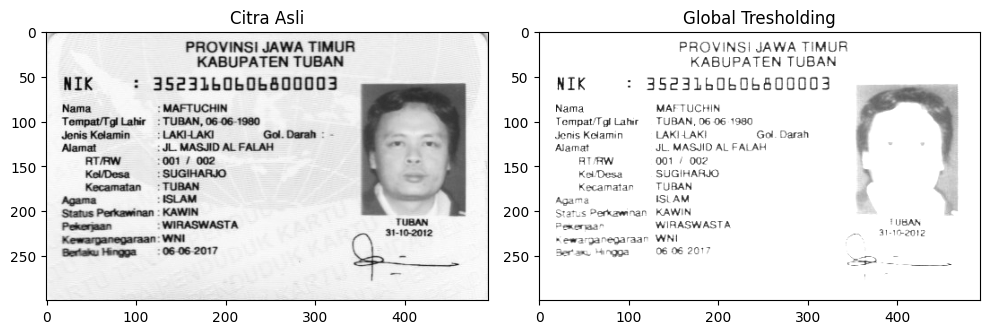

PROVINSI JAWA TIMUR
KABUPATEN TUBAN

NIK  : 352316060b800003
Nama MAFTUCHIN
Tempat/T@l Lahir TUBAN, 06-06 1990
Jen's KelaminLAKILAK! Gol Darah
‘Namat IL MASJID AL FALAH
BTW 001 / og
KelDesa —_SUGIHARUO > 6
Kecamatan TUBAN
ISLAM é N
KAWIN

 

WIRASWASTA 1 UBAN
sewarpaneparaan WNI manent

Beran -ogg2 06 06 2017

 



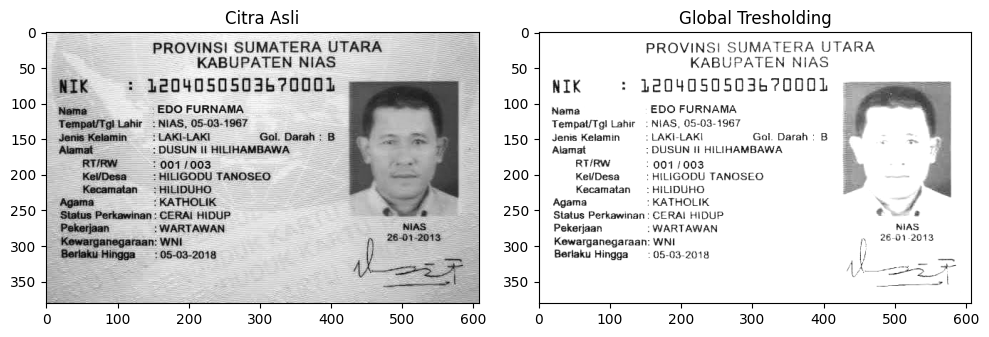

PROVINS! SUMATERA UTARA
KABUPATEN NIAS

NIK > 4204050503670001

Nama EDO FURNAMA
Tempat/Tgl Lahir_: NIAS, 05-03-1967
Jenis Kelamin —: LAKI-LAKI Gol. Darah : B >
Alamat : DUSUN II HILIHAMBAWA

RT/RW 001/003

Kel/Desa HILIGODU TANOSEO

Kecamatan = HILIDUHO
Agama KATHOLIK \e f
Status Perkawinan: CERAI HIDUP e °
Pekerjaan : WARTAWAN NIAS
Kewarganegaraan: WNI eee
Berlaku Hingga =: 05-03-2018 \

a

f =
St
t



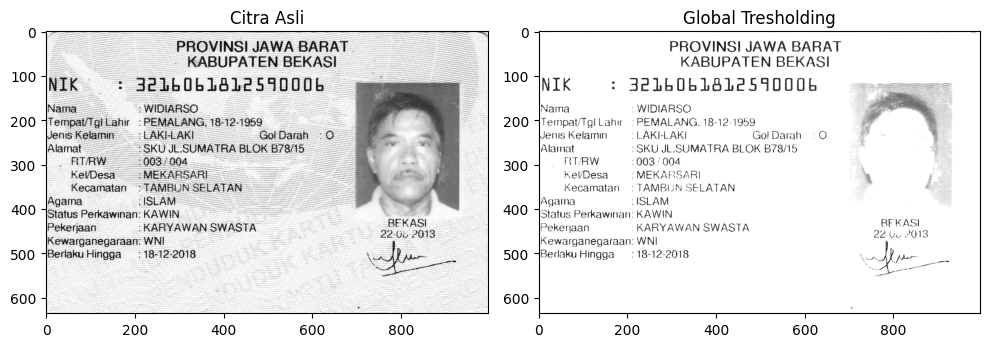

PROVINSI JAWA BARAT
KABUPATEN BEKASI

NIk : 32160b16125900064 emer
Nama :WIDIARSO w
Tempat/Tgi Lahir : PEMALANG, 18-12-1959
Jenis Kelamin : LAKI-LAKI Gol Darah :O
Alamat : SKU JLLSUMATRA BLOK B78/15
RURW 003 / 004
KelDesa : MEKARSARI .
Kecamatan : TAMBUN SELATAN
Agama :ISLAM
Status Perkawinan: KAWIN
Pekerjaan KARYAWAN SWASTA ae

22-e 2013
Kewarganegaraan: WNI cae
Berlaku Hingga —_: 18-12-2018 \ How

 

——



In [52]:
import os
# List all of the files in your Google Drive.
files = os.listdir('/content/drive/MyDrive/PCVK/KTP_More')

# Filter the list of files to only include images.
images = []
for file in files:
  if file.endswith('.jpg') or file.endswith('.png') or file.endswith('.gif'):
    images.append(file)

# Iterate over the list of images and process each image.
for image in images:
  # Load the image.
  image_path = f'/content/drive/MyDrive/PCVK/KTP_More/{image}'
  img = cv.imread(image_path,0)
  # Apply thresholding
  th, threshed = cv.threshold(img, 127, 255, cv.THRESH_TRUNC)
  # Threshold the grayscale image to create a mask.
  threshold = 200
  mask = cv.threshold(gray_image, threshold, 255, cv.THRESH_BINARY_INV)[1]

 # Create a figure with four subplots in a row.
  fig, axs = plt.subplots(1, 2, figsize=(10, 10))

  # Display the first image.
  axs[0].imshow(img, cmap='gray')
  axs[0].set_title('Citra Asli')

  # Display the second image.
  axs[1].imshow(threshed, cmap='gray')
  axs[1].set_title('Global Tresholding')

  # Tighten the layout of the subplots.
  plt.tight_layout()

  # Show the figure.
  plt.show()
  result = pytesseract.image_to_string(threshed)
  print(result)